In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
directory = 'Small_audio_sample'
hop_length = 1024
n_fft = 2048

122219.wav


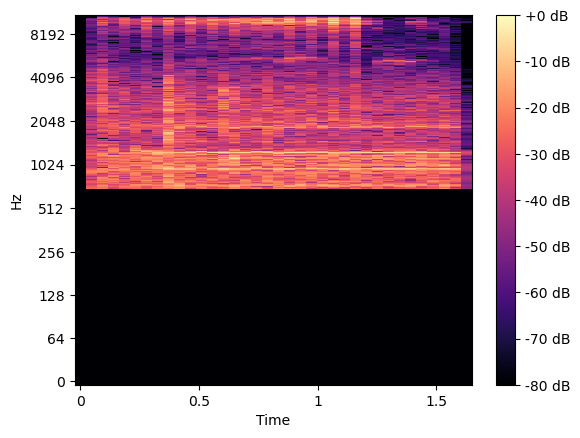

119884.wav


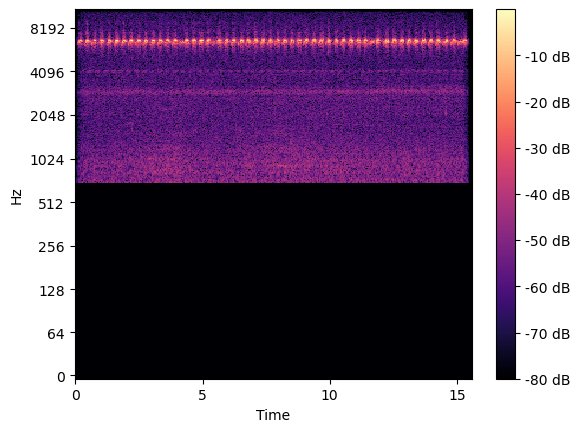

122147.wav


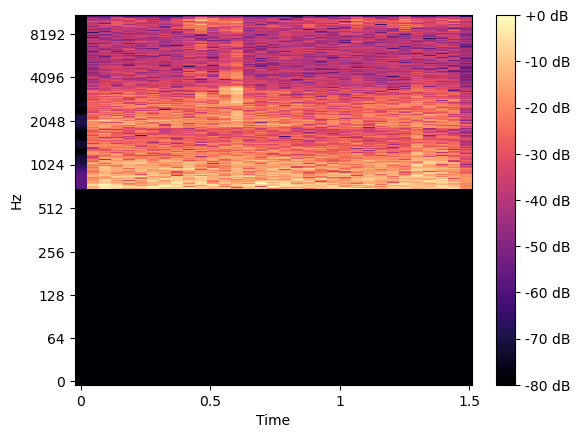

122218.wav


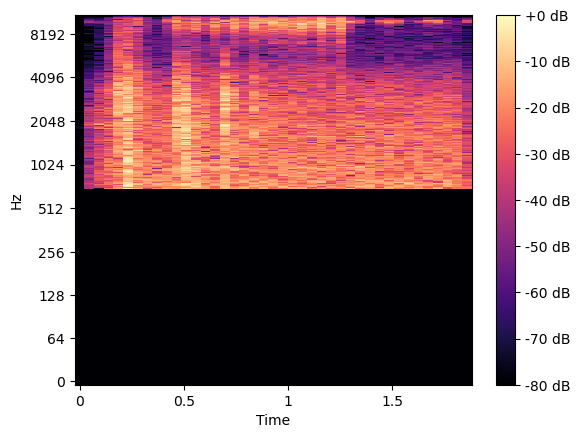

118960_mole.wav


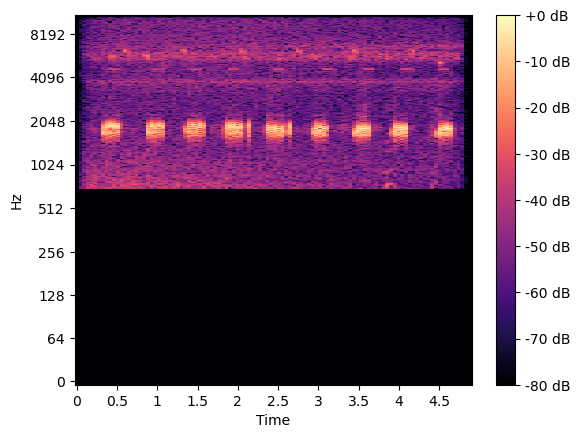

122140.wav


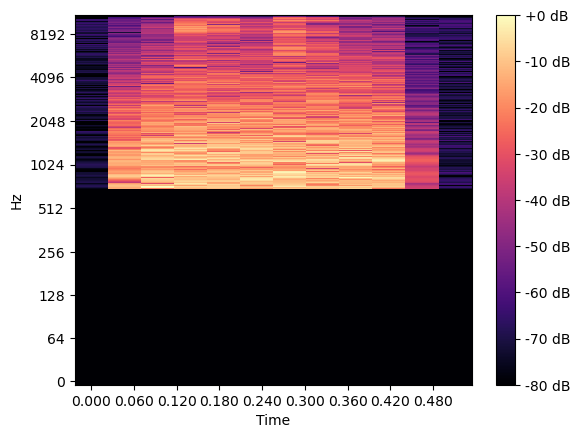

122340.wav


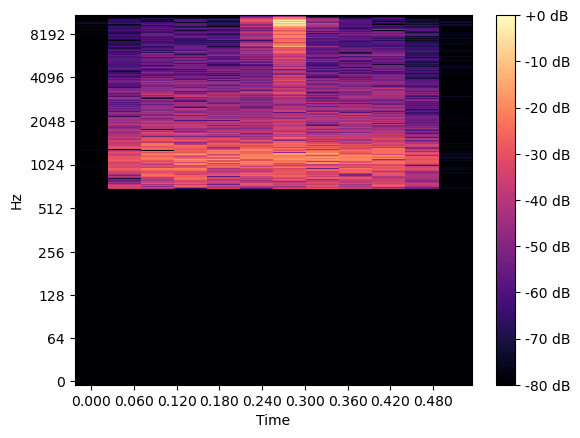

126899.wav


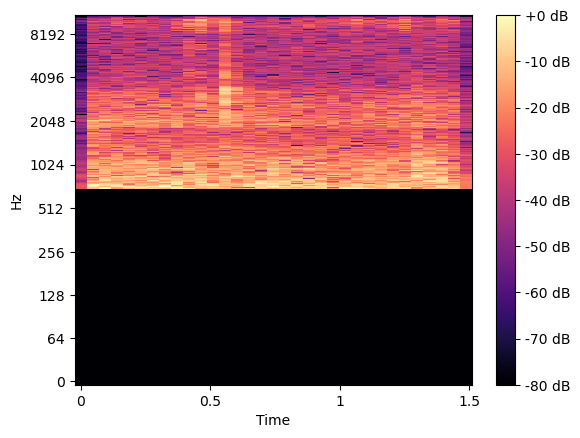

122221.wav


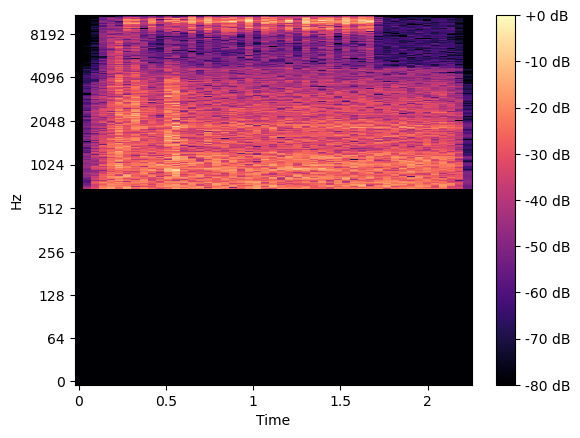

122246.wav


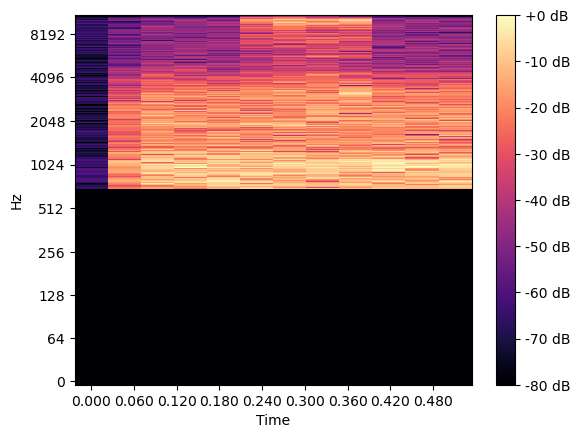

122247.wav


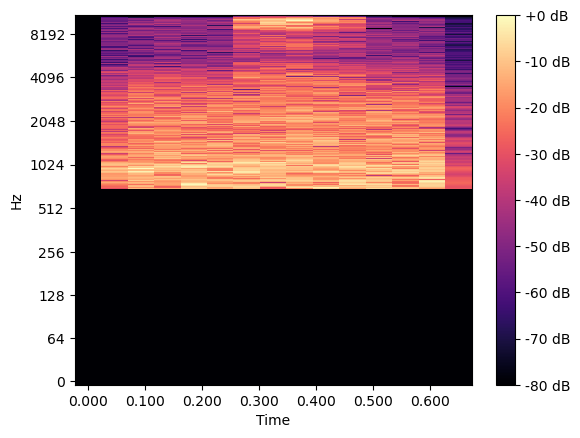

122245.wav


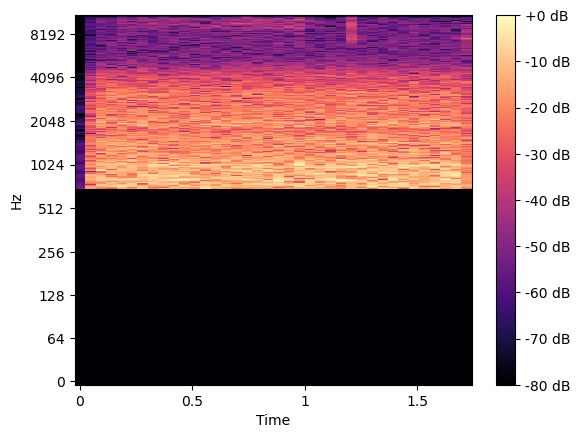

122278.wav


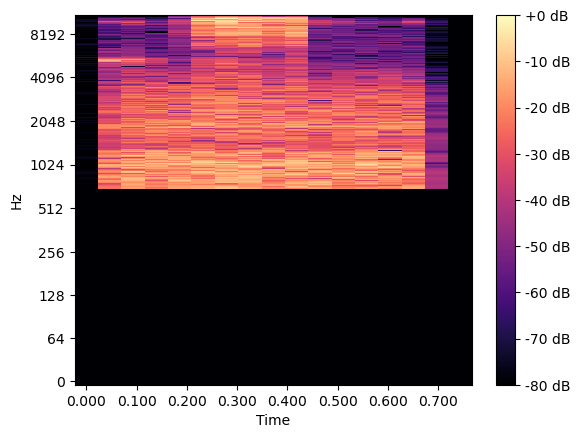

122283.wav


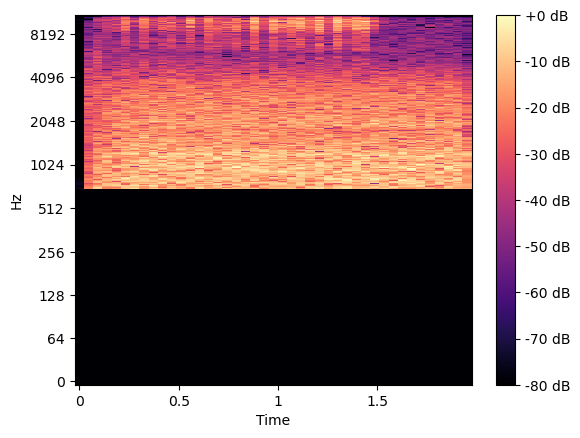

122269.wav


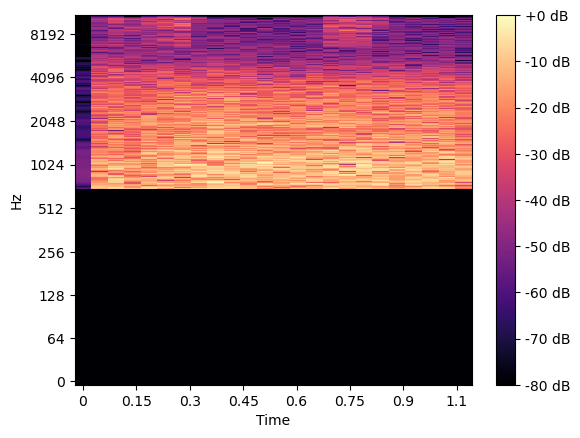

122280.wav


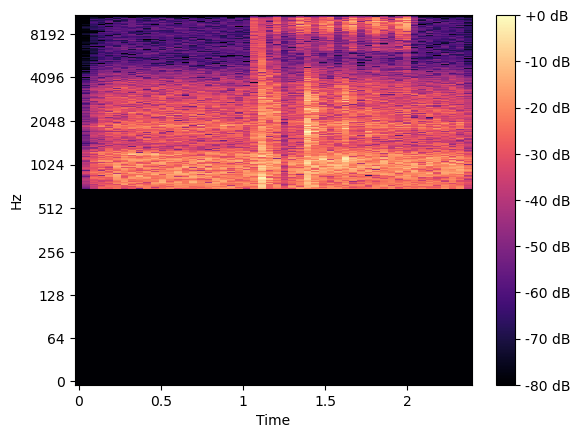

122267.wav


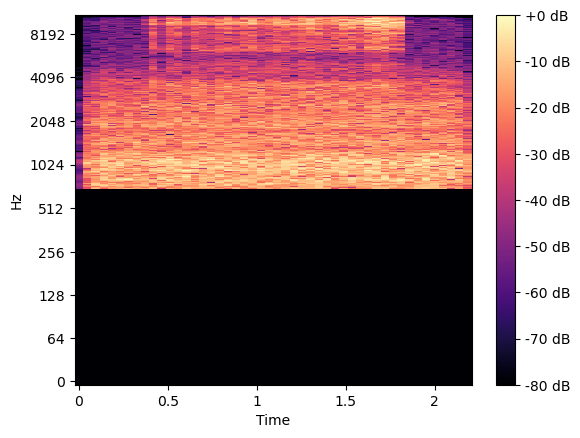

122264.wav


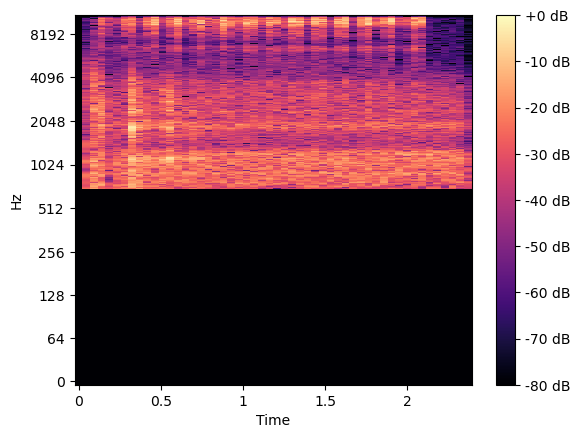

122270.wav


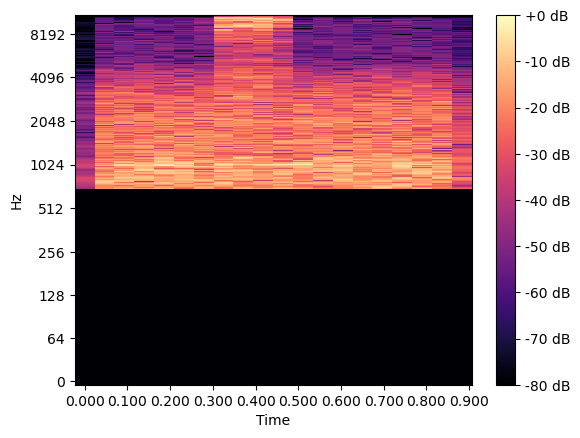

122338.wav


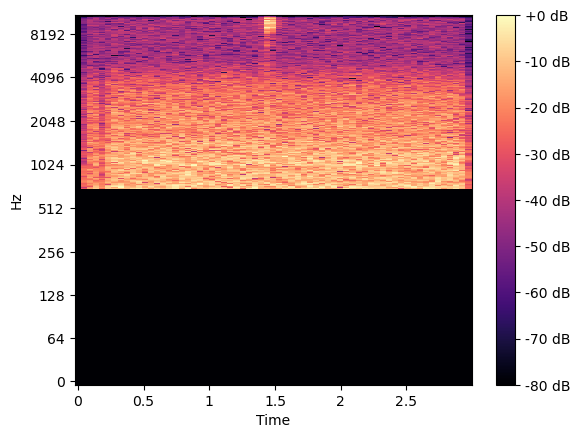

122339.wav


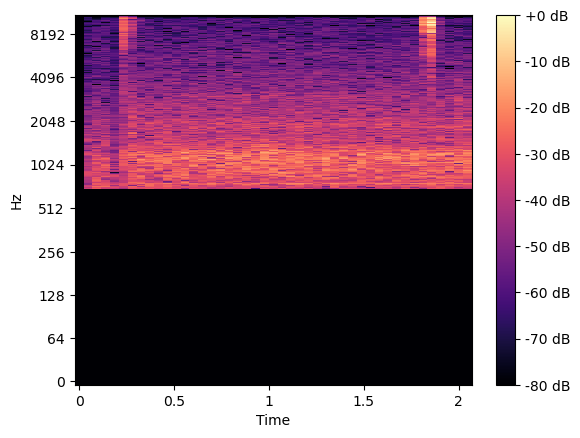

122275.wav


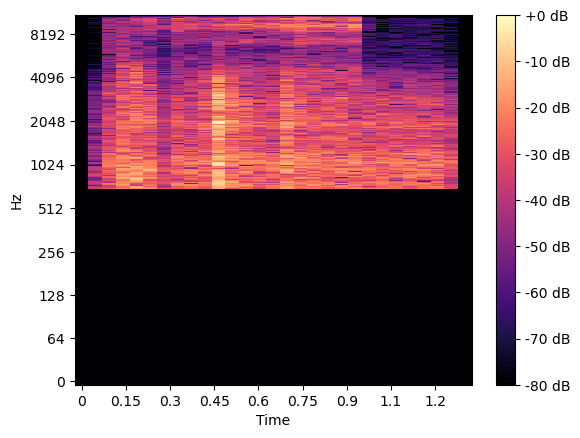

122249.wav


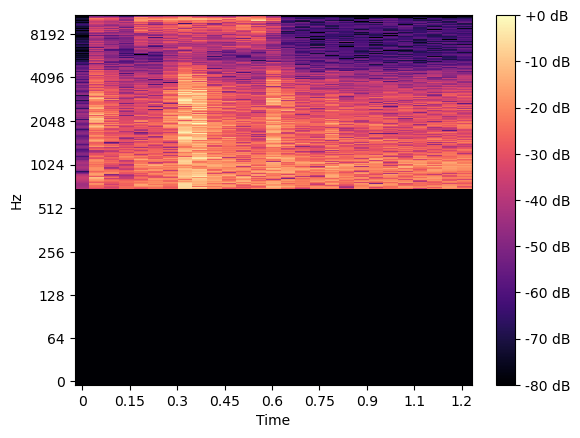

122248.wav


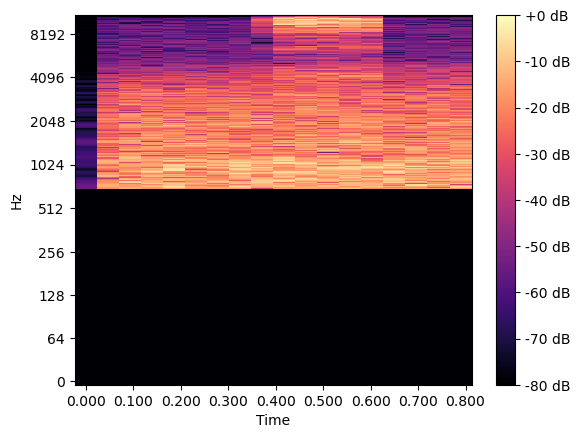

122263.wav


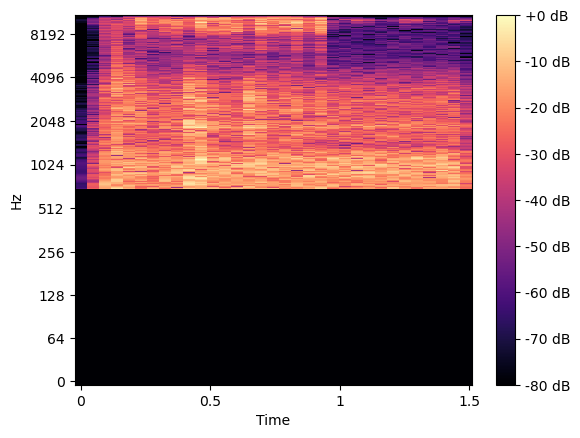

122239.wav


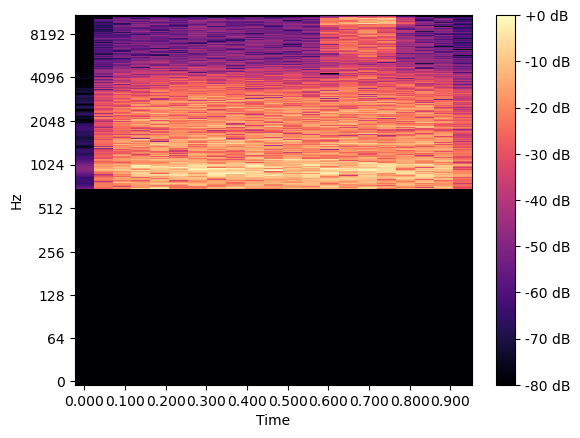

131535.wav


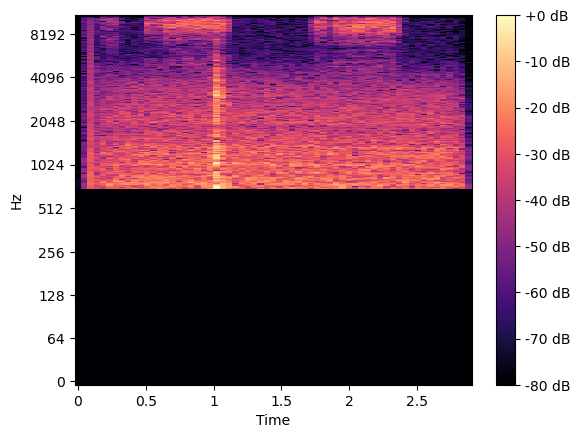

122206.wav


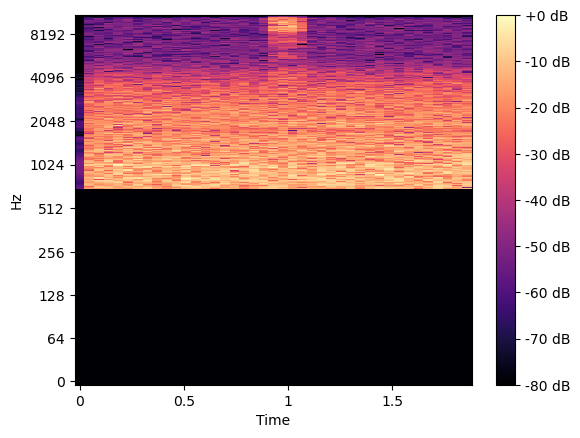

122377.wav


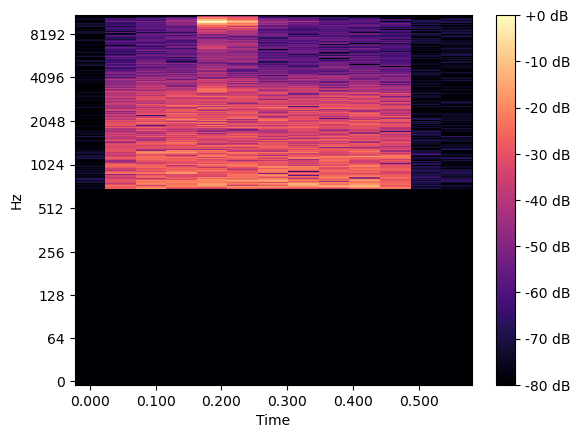

122375.wav


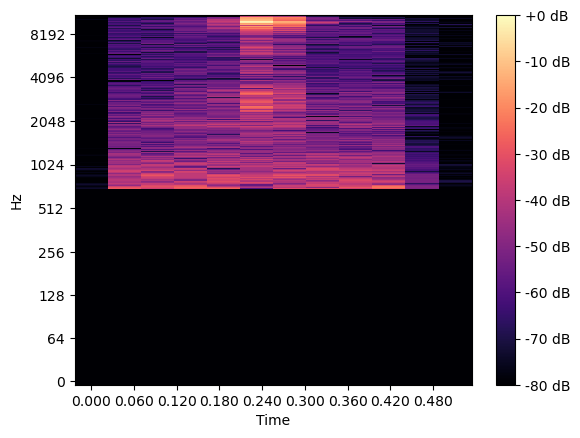

In [29]:
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(filename)
        plot_array(zero_low_freq(remove_Talking(f)))

In [27]:
def remove_Talking(f):
    chirp_song, sr = librosa.load(f)
    split=librosa.effects.split(chirp_song, top_db=60)
    chirp_song_split=chirp_song[split[1,0]:split[1,1]]
    return chirp_song_split

In [14]:
def plot_song(song):
    hop_length = 1024
    n_fft = 2048
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

def plot_array(song):
    hop_length = 1024
    n_fft = 2048
    DB = librosa.amplitude_to_db(song, ref=np.max)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

In [12]:
def remove_low_freq(song):
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    D=D[512:]
    return D

In [23]:
def zero_low_freq(song):
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    D[:65]=0
    return D